# Context

Forbes is a media and publishing company based in the United States that is controlled by Integrated Whale Media Investments and the Forbes family. 
It is well-known for its magazine and rankings of billionaires and sports teams.
As a newly hired Data Scientist of Forbes company, you have been given the task of analyzing the net worth of Forbes Top Billionaires 2020. 
Your goal is to analyze the data and draw insights.

# Problem Statement

# Analyze the net worth of Forbes Top Billionaires 2020.

Data Dictionary

Name - Name of the person
Net worth in billions - Net worth of the person in billions
Country - Country where the person is from
Source - Source of the income
Rank - Rank of the person in the Billionaires list
Age - Age of the person
Industry - Industry to which the person is related to

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\RBC\Downloads\Forbes+Billionaire.csv")

Looking at the top 5 rows

In [7]:
df.head(5)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology


Dimension of Data

In [8]:
df.shape

(2755, 7)

The Datatypes of the columns in the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


Checking for missing values

In [11]:
df.isnull().sum()

Name                    0
NetWorth in billions    0
Country                 0
Source                  0
Rank                    0
Age                     0
Industry                0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

Plots & Its use

To findout outlier are present or not

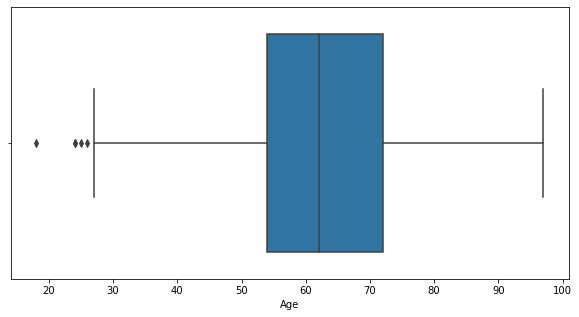

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Age",data=df)
plt.show()

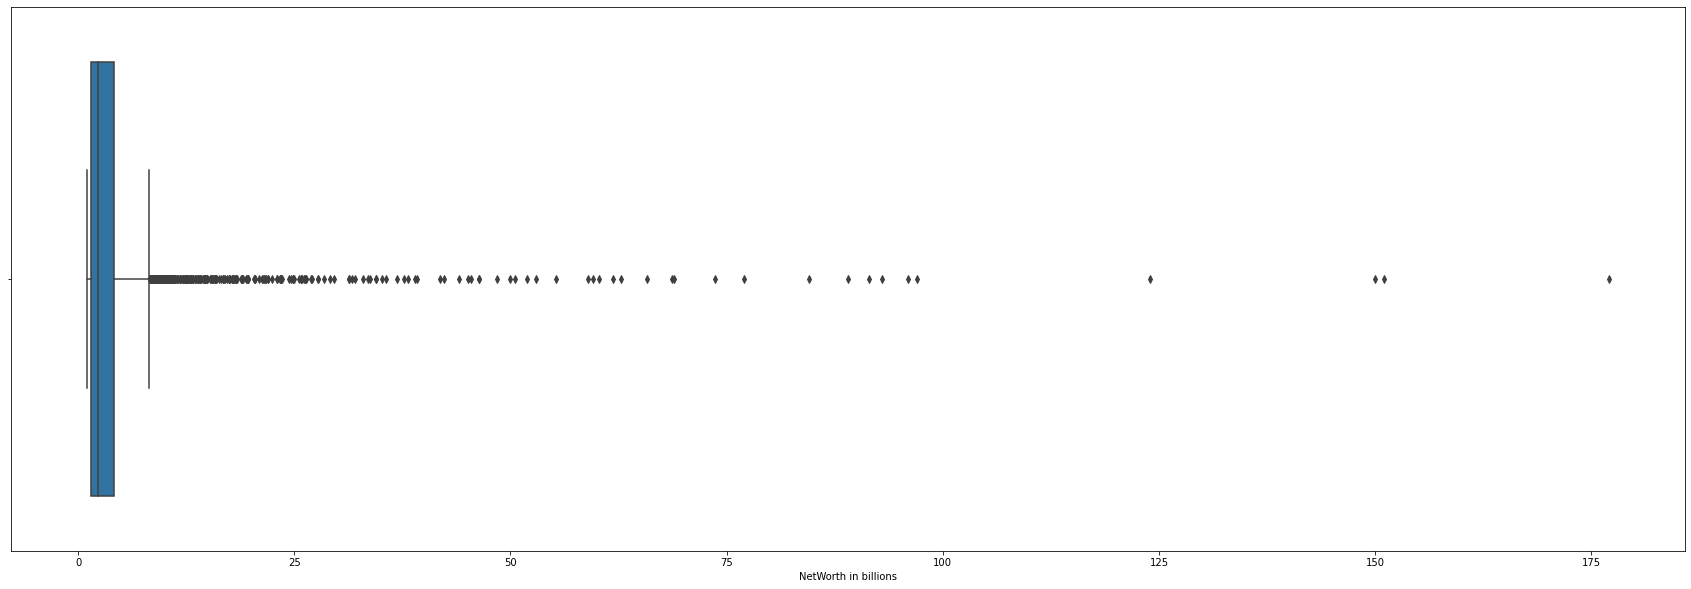

In [25]:
plt.figure(figsize=(30,10))
sns.boxplot(x="NetWorth in billions",data=df)
plt.show()

Data analysis

# Summary of data

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NetWorth in billions,2755.0,4.749220,9.615358,1.0,1.5,2.3,4.2,177.0
Rank,2755.0,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2755.0,63.014519,13.259017,18.0,54.0,62.0,72.0,97.0


In [39]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,2755,2752,Robert Miller,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NetWorth in billions,2755.0,NaN,NaN,NaN,4.74922,9.615358,1.0,1.5,2.3,4.2,177.0
Country,2755,70,United States,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,2755,924,real estate,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,2755.0,NaN,NaN,NaN,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2755.0,NaN,NaN,NaN,63.014519,13.259017,18.0,54.0,62.0,72.0,97.0
Industry,2755,18,Finance & Investments,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution of Age

Displot

<Figure size 720x360 with 0 Axes>

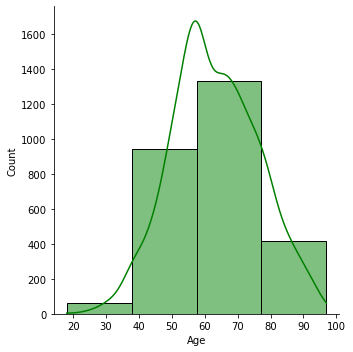

In [51]:
plt.figure(figsize=(10,5))
sns.displot(df["Age"],kde=True,color="green",bins=4)
plt.show()

In [ ]:
Which 5 countries have the maximum billiionaries?

In [53]:
df["Country"].value_counts().head()

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

Which countries do the 5 youngest billionaires belong to?

In [71]:
df.sort_values(by="Age").head(5)["Country"].unique()

array(['Germany', 'Norway', 'China', 'United States'], dtype=object)

Name all the billionaires in India who are younger than 50 years.

In [87]:
indian_billion=df[df["Country"]=="India"].sort_values(by="Age")

In [88]:
indian_billion

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
2528,Binny Bansal,1.1,India,flipkart,2524,38,Technology
2382,Sachin Bansal,1.2,India,flipkart,2378,39,Fashion & Retail
1255,Byju Raveendran and Divya Gokulnath,2.5,India,education technology,1249,39,Technology
1424,Vijay Shekhar Sharma,2.3,India,financial technology,1362,42,Service
2118,Radha Vembu,1.5,India,business software,2035,48,Technology
...,...,...,...,...,...,...,...
302,Kushal Pal Singh,8.3,India,real estate,297,89,Real Estate
2100,Prathap Reddy,1.5,India,healthcare,2035,89,Healthcare
273,Benu Gopal Bangur,8.7,India,cement,274,89,Manufacturing
1716,Lachhman Das Mittal,1.9,India,tractors,1664,90,Automotive


In [91]:
Indian_billionaires = df[df['Country']=='India']

In [92]:
Indian_billionaires

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
9,Mukesh Ambani,84.5,India,diversified,10,63,Diversified
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58,Diversified
71,Shiv Nadar,23.5,India,software services,71,75,Technology
116,Radhakishan Damani,16.5,India,"retail, investments",117,66,Fashion & Retail
122,Uday Kotak,15.9,India,banking,121,62,Finance & Investments
...,...,...,...,...,...,...,...
2683,Ramesh Kumar Dua,1.0,India,footwear,2674,67,Fashion & Retail
2698,Ashok Kajaria,1.0,India,tiles,2674,73,Manufacturing
2699,T.S. Kalyanaraman,1.0,India,jewelry,2674,73,Fashion & Retail
2712,Rafique Malik,1.0,India,footwear,2674,70,Fashion & Retail


In [101]:
Indian_billionaires[Indian_billionaires["Age"]<50]["Name"].values

array(['Byju Raveendran and Divya Gokulnath', 'Vijay Shekhar Sharma',
       'Acharya Balkrishna', 'Radha Vembu', 'Ranjan Pai', 'Sachin Bansal',
       'Binny Bansal', 'Sekar Vembu'], dtype=object)

<Figure size 2520x1080 with 0 Axes>

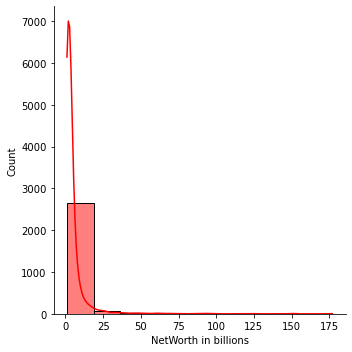

In [120]:
plt.figure(figsize=(35,15))
sns.displot(df["NetWorth in billions"],kde=True,color="red",bins=10)

# Countplot for industry

In [116]:
df.Industry.value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

C:\Users\RBC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


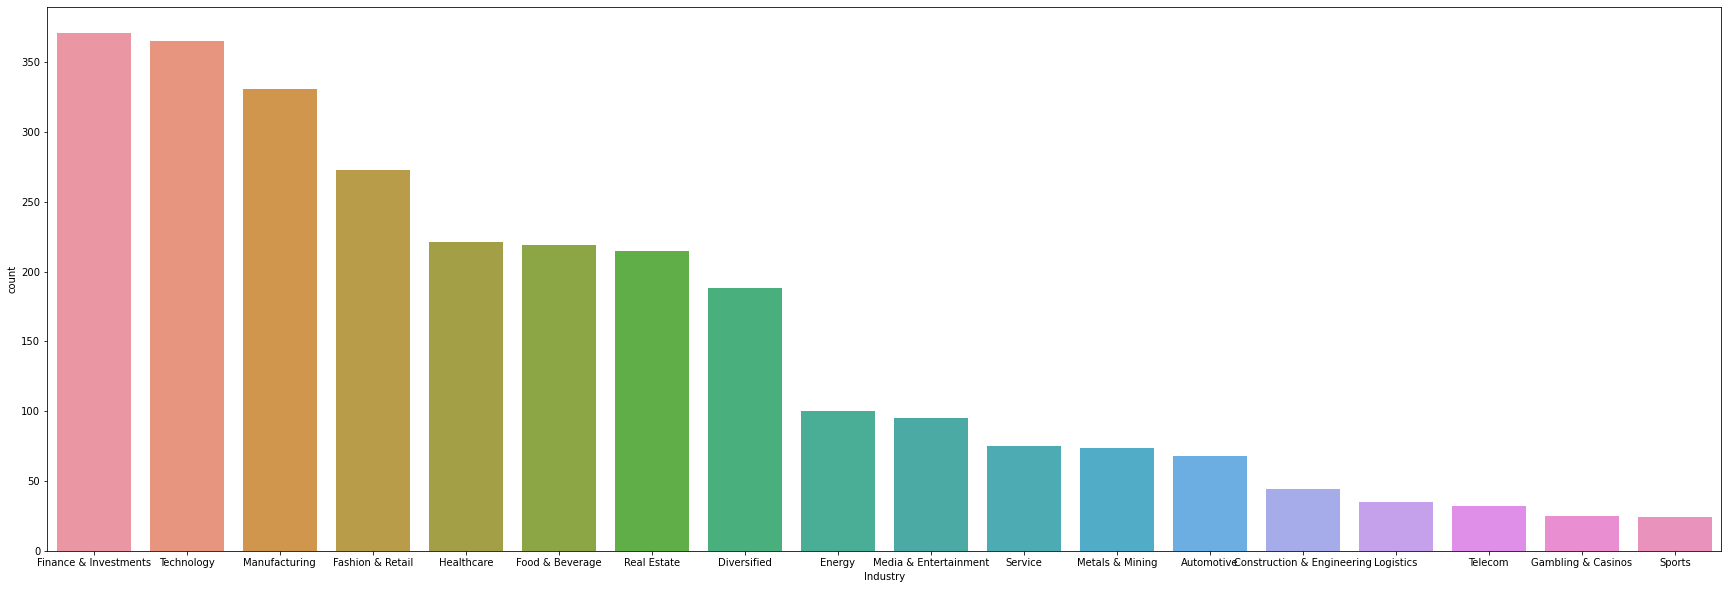

In [122]:
plt.figure(figsize=(30,10))
sns.countplot(df['Industry'],order=df.Industry.value_counts().index)
plt.show()

# pi-Chart

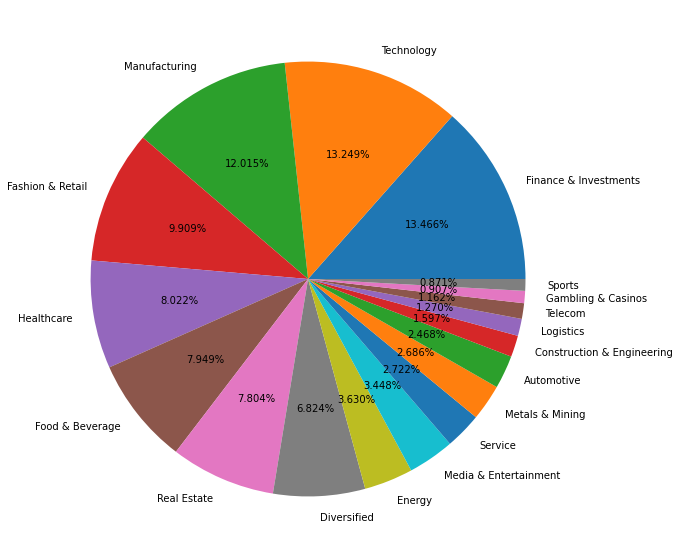

In [131]:
plt.figure(figsize=(20,10))
plt.pie(df.Industry.value_counts(),labels=df.Industry.value_counts().index,autopct="%0.3f%%")
plt.show()

To take out slice of Finance and Investments

In [147]:
list_of_Industry=df["Industry"].value_counts()

In [148]:
list_of_Industry.index

Index(['Finance & Investments', 'Technology', 'Manufacturing',
       'Fashion & Retail', 'Healthcare', 'Food & Beverage', 'Real Estate',
       'Diversified', 'Energy', 'Media & Entertainment', 'Service',
       'Metals & Mining', 'Automotive', 'Construction & Engineering',
       'Logistics', 'Telecom', 'Gambling & Casinos', 'Sports'],
      dtype='object')

In [149]:
len(list_of_Industry)

18

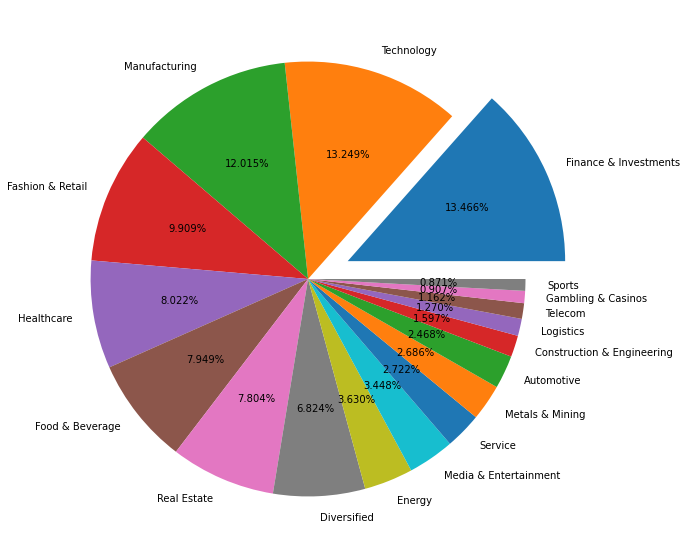

In [143]:
plt.figure(figsize=(20,10))
plt.pie(df.Industry.value_counts(),labels=df.Industry.value_counts().index,autopct="%0.3f%%",
        explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))

plt.show()

Using Box plot to show industry

<function matplotlib.pyplot.show(close=None, block=None)>

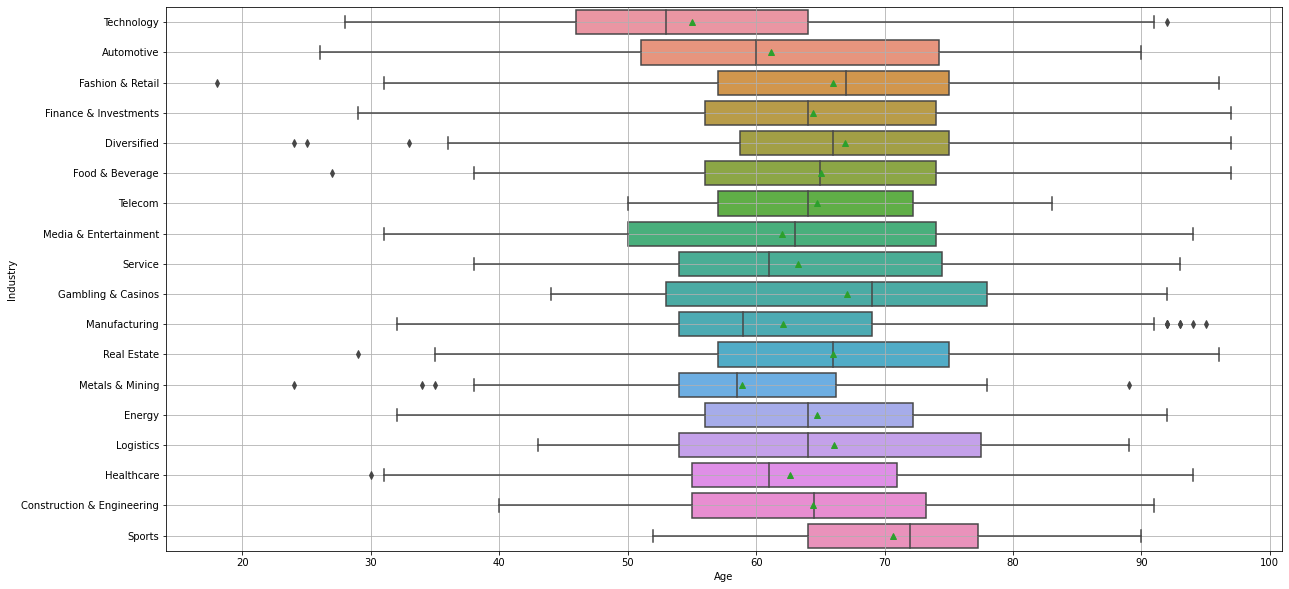

In [155]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Age",y="Industry",data=df,showmeans=True)
plt.grid()
plt.show

# Scatterplot

<Figure size 1440x720 with 0 Axes>

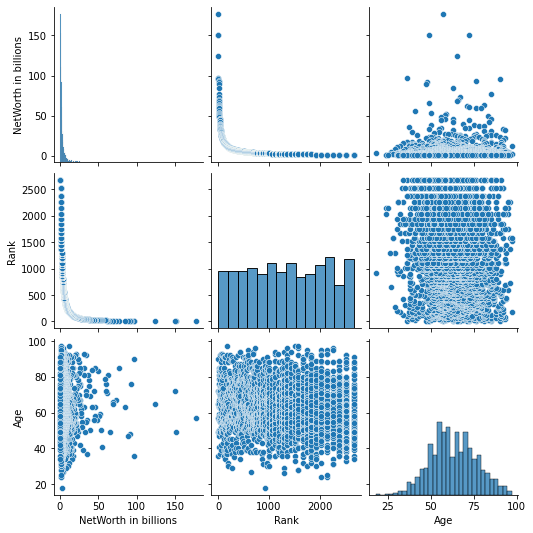

In [158]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df)
plt.show()

Use strip plot to check relationship between age and Industry

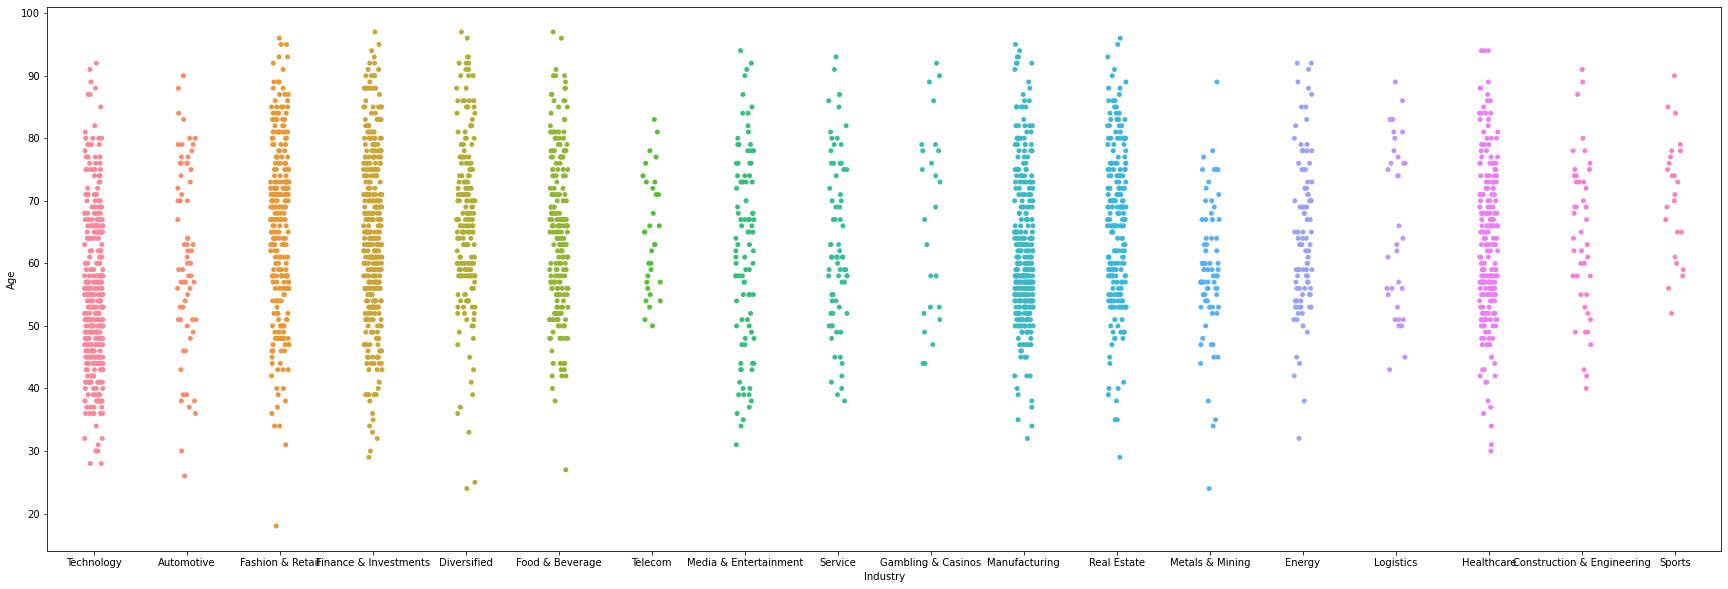

In [159]:
plt.figure(figsize=(30,10))
sns.stripplot(x = 'Industry', y = 'Age', data = df)

# display the plot
plt.show()

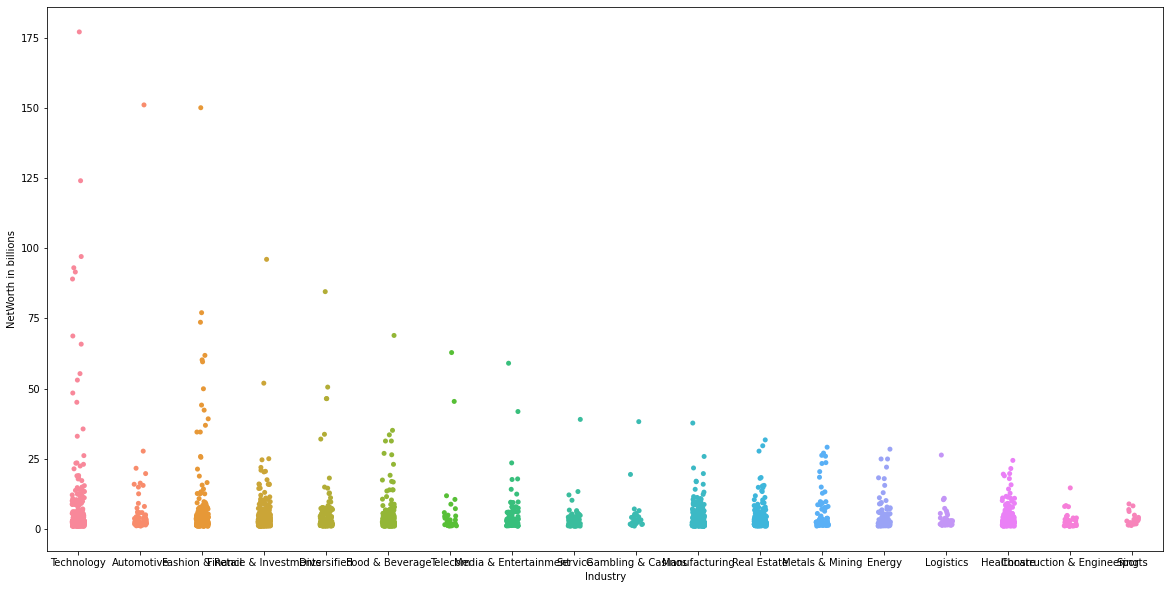

In [173]:
plt.figure(figsize=(20,10))
sns.stripplot(x = 'Industry', y = "NetWorth in billions", data = df)

# display the plot
plt.show()

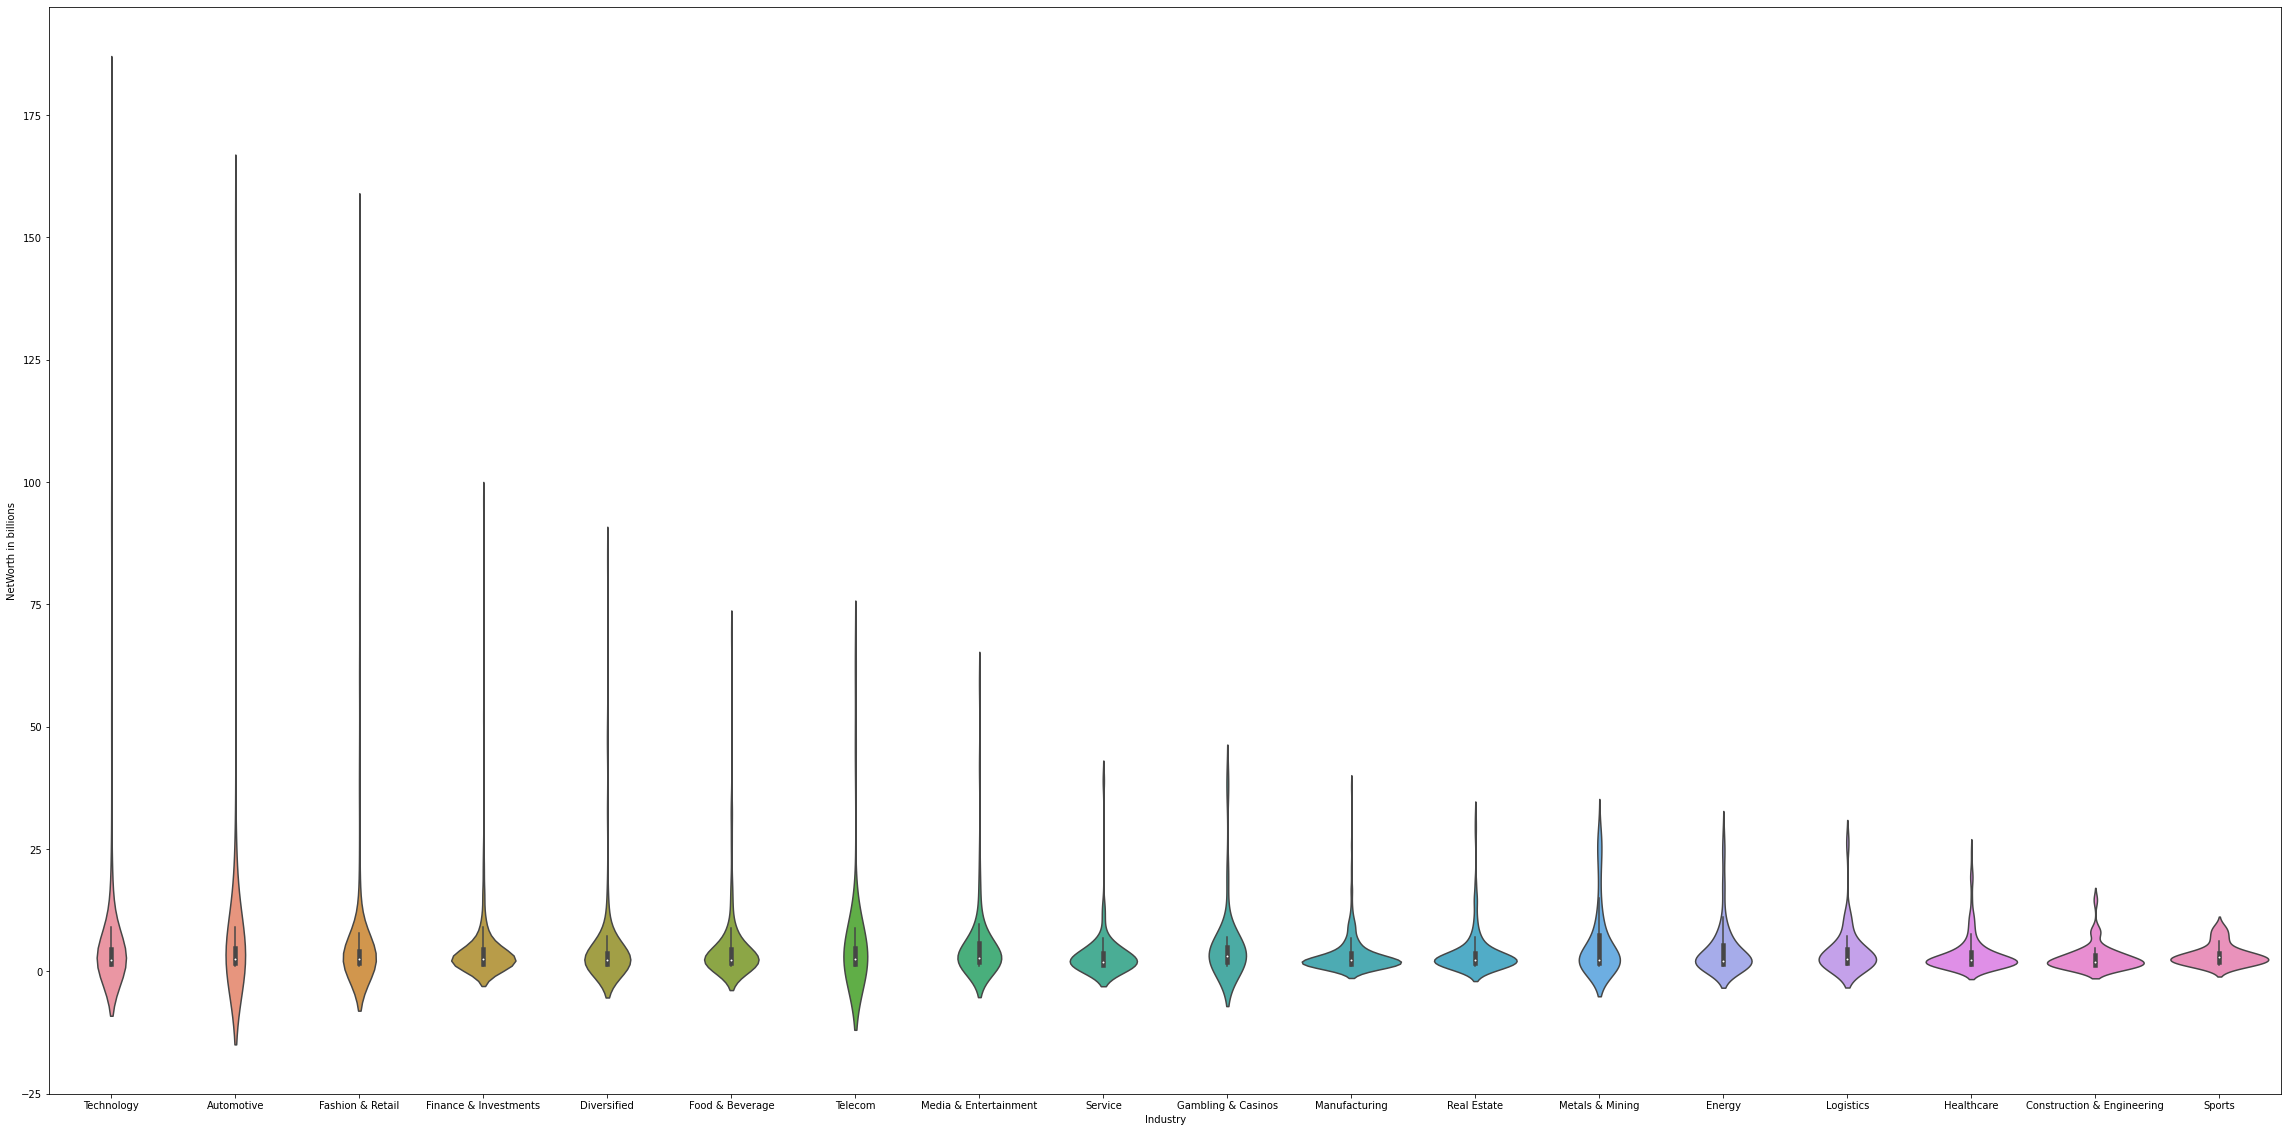

In [169]:
plt.figure(figsize=(40,20))
sns.violinplot(x = 'Industry', y = "NetWorth in billions", data = df)

# display the plot
plt.show()

# Heatmap plot

In [174]:
df.corr()

,NetWorth in billions,Rank,Age
NetWorth in billions,1.000000,-0.475346,0.035225
Rank,-0.475346,1.000000,-0.104220
Age,0.035225,-0.104220,1.000000


<AxesSubplot:>

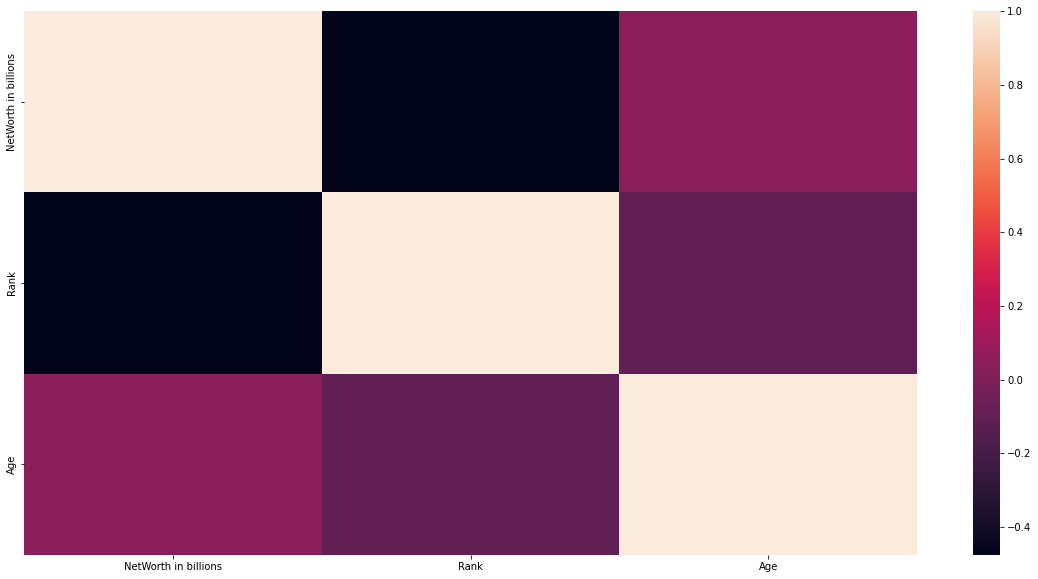

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())